In [2]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)



Using TensorFlow backend.


In [3]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)


In [4]:
# creating a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieving the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# creating the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))



In [5]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [6]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()


In [8]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print( x_train.shape)
print (x_test.shape)


(60000, 784)
(10000, 784)


In [9]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 9s 150us/step - loss: 0.3585 - val_loss: 0.2710
Epoch 2/50
60000/60000 [==============================] - 6s 98us/step - loss: 0.2628 - val_loss: 0.2507
Epoch 3/50
60000/60000 [==============================] - 6s 105us/step - loss: 0.2404 - val_loss: 0.2284
Epoch 4/50
60000/60000 [==============================] - 6s 100us/step - loss: 0.2215 - val_loss: 0.2123
Epoch 5/50
60000/60000 [==============================] - 6s 94us/step - loss: 0.2074 - val_loss: 0.2000
Epoch 6/50
60000/60000 [==============================] - 7s 114us/step - loss: 0.1964 - val_loss: 0.1902
Epoch 7/50
60000/60000 [==============================] - 6s 103us/step - loss: 0.1877 - val_loss: 0.1825
Epoch 8/50
60000/60000 [==============================] - 6s 106us/step - loss: 0.1807 - val_loss: 0.1762
Epoch 9/50
60000/60000 [==============================] - 6s 98us/step - loss: 0.1749 - val_loss: 0.1708

In [10]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)


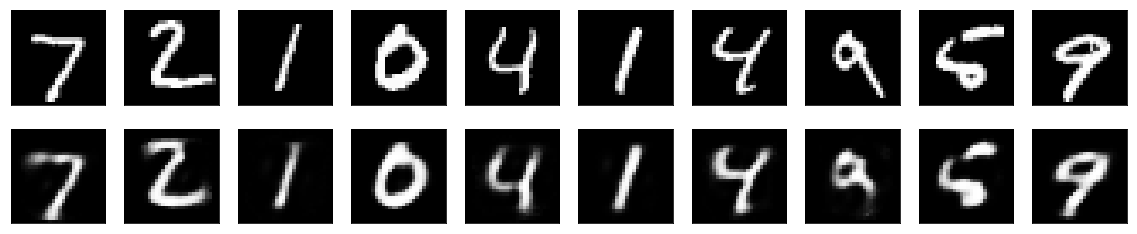

In [11]:
# using Matplotlib 
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
